In [1]:
import sys
from Lilygo.Recording import Recording
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft

data/trace_000.json


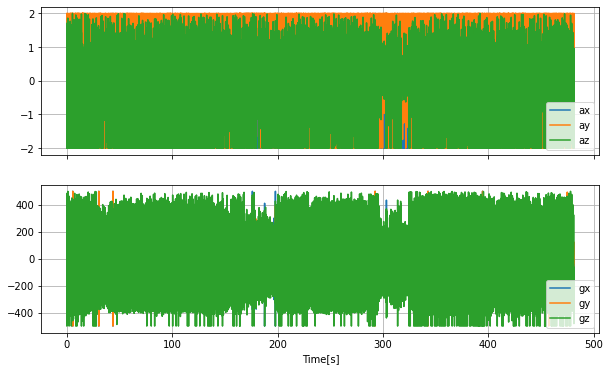

In [3]:
filename = "data/trace_000.json" # e.g. 'data/someDataTrace.json'
print(filename)
trace = Recording(filename, no_labels=True, mute=True)
trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz']])

In [4]:
x_axis = np.array(trace.data["ax"].timestamps)
magnitude_x = np.array(trace.data["ax"].values)
magnitude_y = np.array(trace.data["ay"].values)
magnitude_z = np.array(trace.data["az"].values)
magnitude = np.sqrt(magnitude_x**2 + magnitude_y**2 + magnitude_z**2)
avg_magnitude = np.mean(magnitude)
net_magnitude = magnitude - avg_magnitude

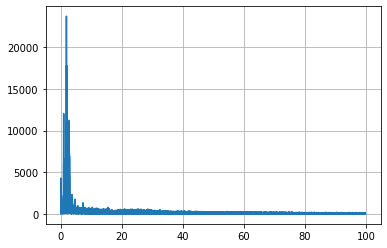

In [5]:
x_axis = np.array(trace.data["ax"].timestamps)
L = len(x_axis)
L1 = 0
L2 = L
#L1 = L*20//100 # for windows
#L2 = L*33//100
x_axis = x_axis[L1:L2]
fft_freq = fft(net_magnitude[L1:L2])
L = len(x_axis)
Ts = np.mean(np.diff(x_axis))
Fs = 1.0 / Ts
P2 = abs(fft_freq)
P1 = P2[0:L//2]
P1 = 2*P1
P1[0] = P1[0]/2
f = Fs*range(L//2)/L

fig, ax = plt.subplots()
ax.plot(f,P1)
ax.grid()
plt.show()